"Скрипичная" диаграмма (violinplot)

Скрипичный график комбинирует в себе элементы диаграммы размаха и ядерной оценки плотности KDE, что позволяет лучше визуализировать распределение данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seaborn.violinplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, inner='box', split=False, width=0.8, dodge='auto', gap=0, linewidth=None, linecolor='auto', cut=2, gridsize=100, bw_method='scott', bw_adjust=1, density_norm='area', common_norm=False, hue_norm=None, formatter=None, log_scale=None, native_scale=False, legend='auto', scale=<deprecated>, scale_hue=<deprecated>, bw=<deprecated>, inner_kws=None, ax=None, **kwargs)

sns.violinplot()

1) data: DataFrame или массив, содержащий данные для построения графика;
2) x: название переменной или вектор данных для оси X;
3) y: название переменной или вектор данных для оси Y;
4) orient: указывает, какая ось используется для категорий, а какая для числовых данных ('v', 'h');
5) hue: название переменной или вектор данных, определяющий расцветку разных категорий;
6) order: упорядоченный список уникальных значений для той оси, на которой отображаются категориальные данные;
7) hue_order: упорядоченный список уникальных значений для переменной hue;
8) inner: определяет что показывать внутри скрипичной диаграммы (варианты: 'box', 'quart' или 'quartiles', 'point', 'stick', None). По умолчанию inner='box';
9) split: разделение "виолончели" на две части в зависимости от hue. По умолчанию split=False;
10) width: задает ширину каждой "виолончели". Значение по умолчанию = 0.8;
11) dodge: логическое значение, определяющее, будут ли "виолончели" разных категорий hue расположены рядом (если True) или наложены друг на друга (если False);
12) linewidth: задает толщину линии границы "виолончели";
13) linecolor: задает цвет линии границы "виолончели";
14) cut: количество точек вне диапазона данных, которые будут включены в оценку плотности. По умолчанию cut=2;
15) gridsize: количество точек для оценки плотности. По умолчанию gridsize=100;
16) scale, density_norm: определяет, как масштабировать каждую "виолончель" (варианты: 'area' (по умолчанию), 'count', 'width'). До   13-й версии seaborn используется scale, с 13-й работают и scale, и density_norm. Сообщается, что 15-й будет работать только density_norm.
17) gap: расстояние между различными "виолончелями" (или подкатегориями) в пределах одной категории. 

Описание аргументов для параметра inner

1. 'box' (по умолчанию): внутри "виолончели" отображается диаграмма размаха.
2. 'quartiles' или 'quart': отображаются линии, соответствующие первому, второму (медиана) и третьему квартилям, что помогает понять, где 25%, 50% и 75% данных.
3. 'point': внутри "виолончели" отображаются точки, представляющие отдельные наблюдения. Этот вариант полезен для визуализации отдельных значений и понимания плотности данных.
4. 'stick': внутри "виолончели" отображаются вертикальные линии, представляющие отдельные наблюдения. Этот вариант полезен для понимания распределения данных без перекрытия точек.
5. 'None': при установке inner=None внутри "виолончели" не отображается никаких дополнительных элементов

Описание аргументов для параметра density_norm

Параметр density_norm или scale (в зависимости от версии библиотеки seaborn) функции sns.violinplot() управляет нормализацией плотности данных на скрипичной диаграмме. Этот параметр определяет, как плотность данных будет масштабироваться, что влияет на вид и интерпретацию графика.

1. 'area': Плотность нормализуется так, чтобы общая площадь каждого скрипичного графика была одинаковой, независимо от количества данных. То есть высота каждой "виолончели" будет масштабироваться так, чтобы они все занимали одинаковую площадь.
2. 'count': В данном случае плотность нормализуется по количеству наблюдений. Чем больше наблюдений в категории, тем шире будет "виолончель".
3. 'width': При использовании 'width', максимальная ширина каждой "виолончели" будет одинаковой, но площадь может варьироваться в зависимости от плотности данных.

Описание параметра bw_method

Параметр bw_method определяет метод или точное значение для вычисления ширины полосы пропускания, используемой при оценке плотности ядра. Полоса пропускания влияет на степень сглаживания распределения данных: слишком узкая полоса может привести к шумному и детализированному графику, в то время как слишком широкая полоса может сгладить важные особенности распределения.

Параметр bw_method может принимать следующие значения:

1) string: Включает предопределенные методы, такие как 'scott' (по умолчанию) и 'silverman'. Эти методы основаны на эмпирических правилах и подходят для большинства случаев.
        a) 'scott': Подходит, когда у вас среднее количество данных и вам нужно что-то универсальное.
        b) 'silverman': Подходит, когда у вас много данных и вы хотите видеть общую картину без мелких деталей.
2) scalar: Является числом с плавающей точкой, которое непосредственно определяет ширину полосы пропускания.

In [4]:
df = sns.load_dataset('mpg').dropna()

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


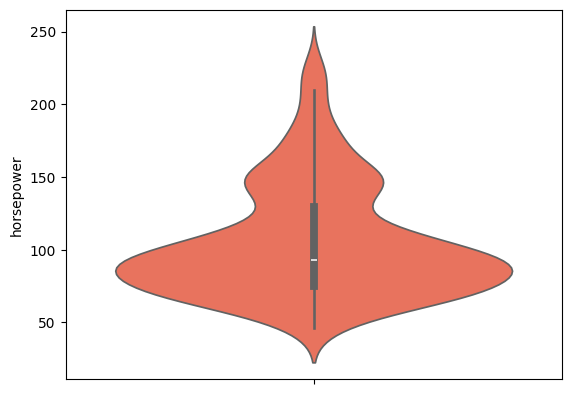

In [23]:
df = df[df['cylinders'].isin([4, 6, 8])]

sns.violinplot(data=df, y='horsepower',
               color='tomato');

# sns.violinplot(df['horsepower'],
               # orient='h');

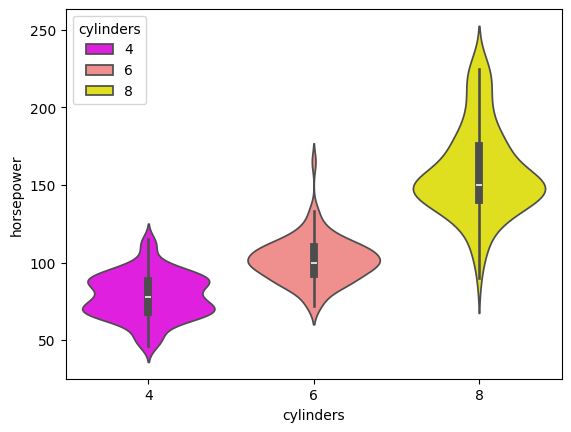

In [25]:
sns.violinplot(x='cylinders', y='horsepower', data=df,
               hue='cylinders',
               palette='spring');

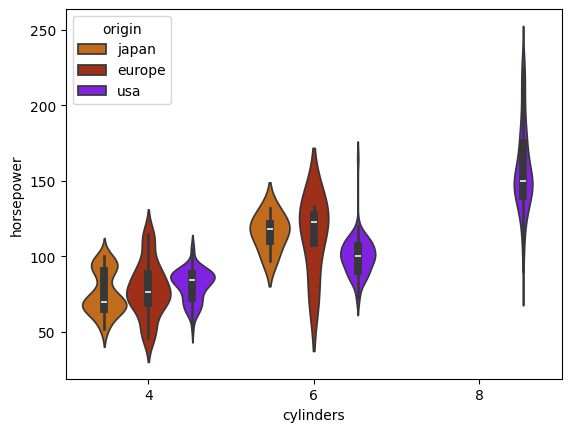

In [27]:
sns.violinplot(x='cylinders', y='horsepower', data=df,
               palette='gnuplot_r',
               hue='origin');

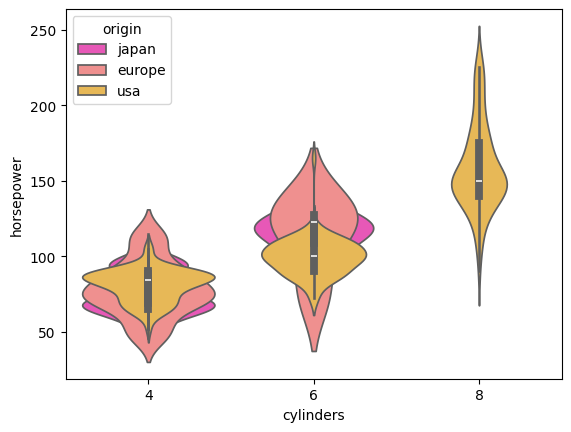

In [12]:
sns.violinplot(x='cylinders', y='horsepower', data=df,
               palette='spring',
               hue='origin', 
               dodge=False);

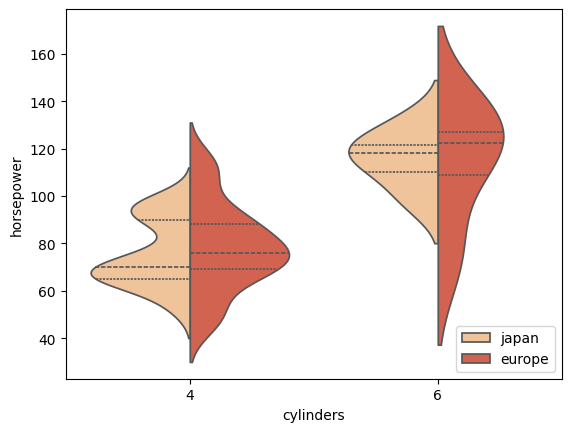

In [29]:
sns.violinplot(x='cylinders', y='horsepower', data=df[df['origin'].isin(['japan', 'europe'])],
               palette='OrRd',
               hue='origin',
               split=True,
               inner='quart')
plt.legend(loc=4);

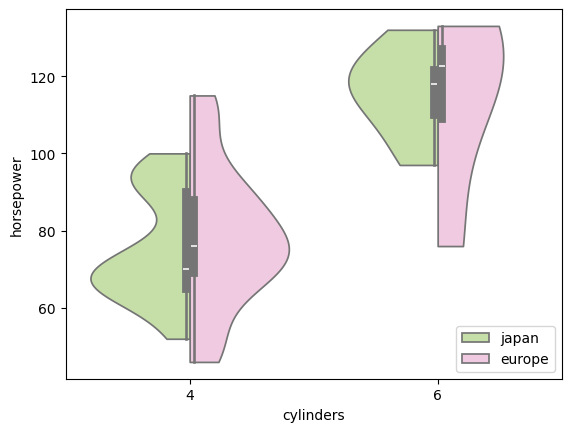

In [31]:
# Параметр cut задает число стандартных отклонений, на которые KDE будет расширяться за пределы минимальных и максимальных значений данных. 
# Это помогает создать более плавную и эстетически приятную визуализацию плотности данных.
# В зависимости от значений параметра cut, график может выглядеть более сглаженным или обрезанным. 
# Значение cut=0 ограничит "виолончель" строго границами данных, а большие значения создадут более длинные хвосты. 
# По умолчанию параметр cut принимает значение 2.

sns.violinplot(x='cylinders', y='horsepower', data=df[df['origin'].isin(['japan', 'europe'])],
               palette='PiYG_r',
               hue='origin',
               split=True,
               cut=0)
plt.legend(loc=4);

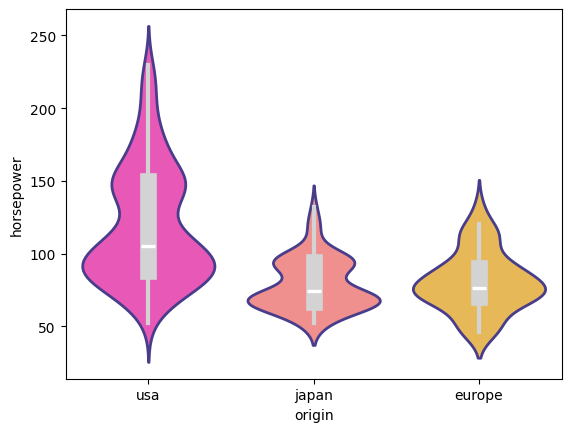

In [33]:
sns.violinplot(x='origin', y='horsepower', data=df,
               hue='origin',
               palette='spring',
               linewidth=2,
               linecolor='DarkSlateBlue',
               inner_kws={'box_width': 12, 'whis_width': 3, 'color': 'lightgrey'});

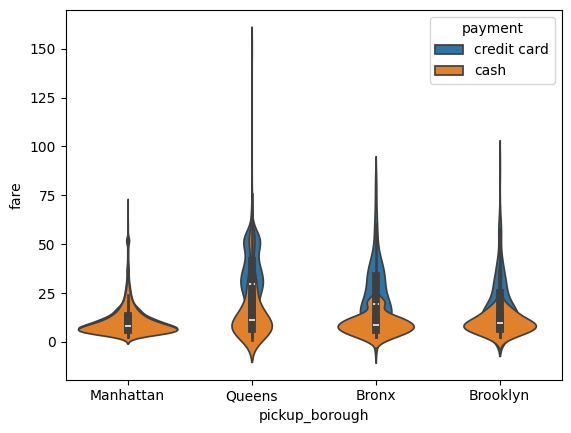

In [35]:
taxis = sns.load_dataset('taxis').dropna()
sns.violinplot(data=taxis, x='pickup_borough', y='fare', 
               hue='payment', 
               dodge=False);